# Titanic Survival Prediction

Loading dataset & initial exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("shape:", df.shape)

shape: (891, 12)


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
display(df.describe(include='all').T)   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print("Duplicate rows:", df.duplicated().sum())
df.sample(5)

Duplicate rows: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.00,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.00,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.50,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.00,NaN,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.05,NaN,S


EDA plots:

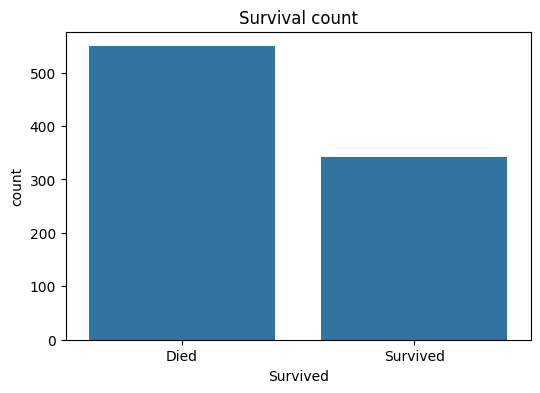

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [7]:
# Survival distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.xticks([0,1], ['Died','Survived'])
plt.title("Survival count")
plt.show()
print(df['Survived'].value_counts(normalize=True).rename('proportion'))

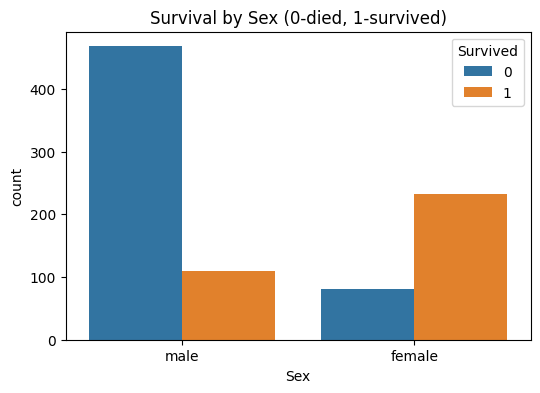

In [8]:
# Survival by sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex (0-died, 1-survived)")
plt.show()

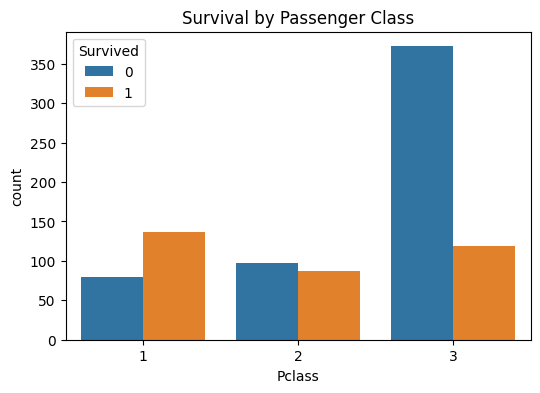

In [9]:
# Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

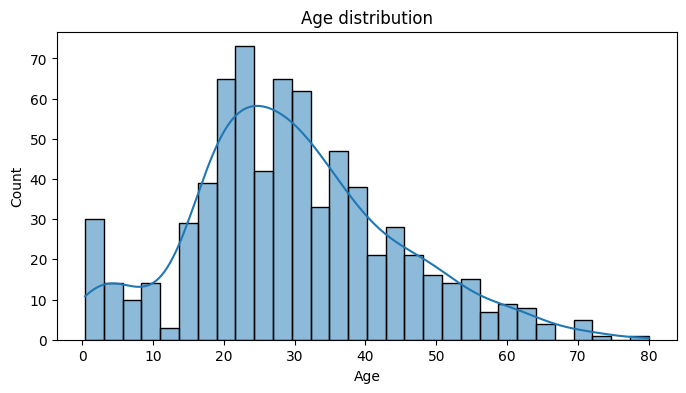

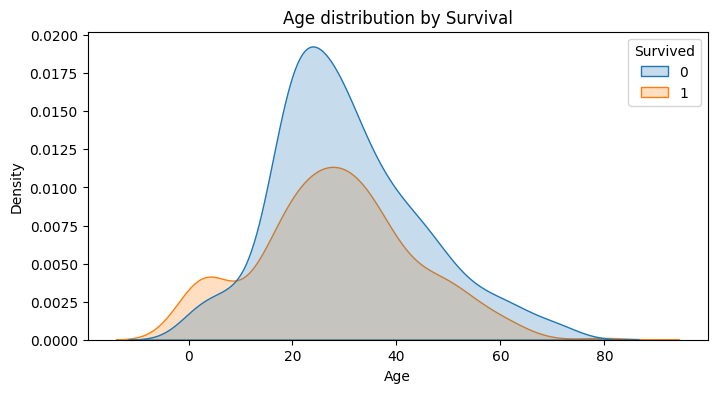

In [10]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age distribution")
plt.show()
# KDE by survival (drop null ages)
# To check if age correlates with survival?
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['Age'].notna()], x='Age', hue='Survived', fill=True)
plt.title("Age distribution by Survival")
plt.show()

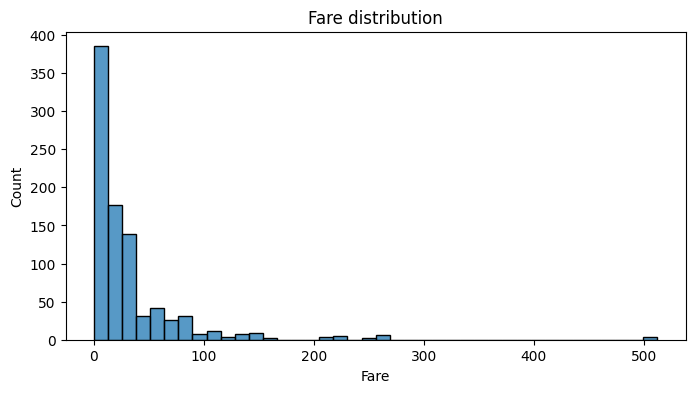

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Fare'].dropna(), bins=40)
plt.title("Fare distribution")
plt.show()

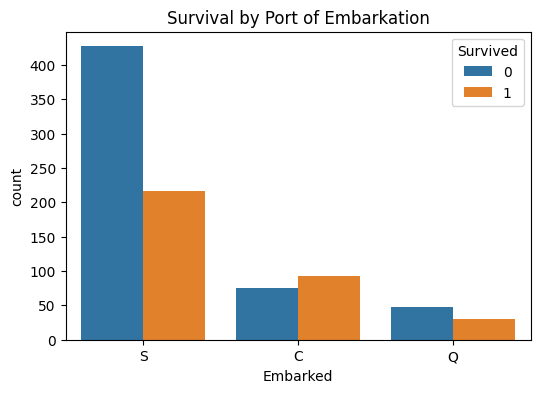

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Port of Embarkation")
plt.show()

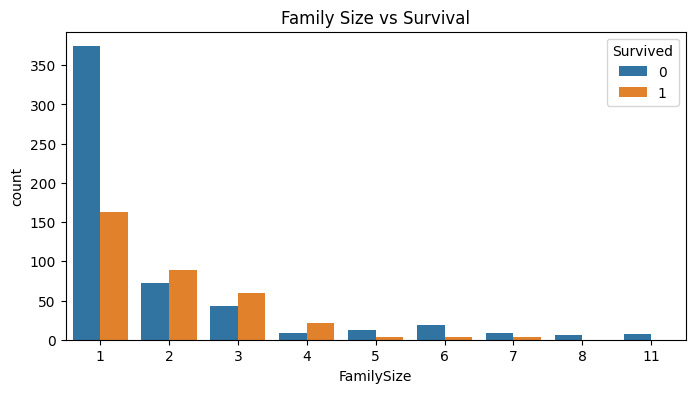

In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1   
plt.figure(figsize=(8,4))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Family Size vs Survival")
plt.show()

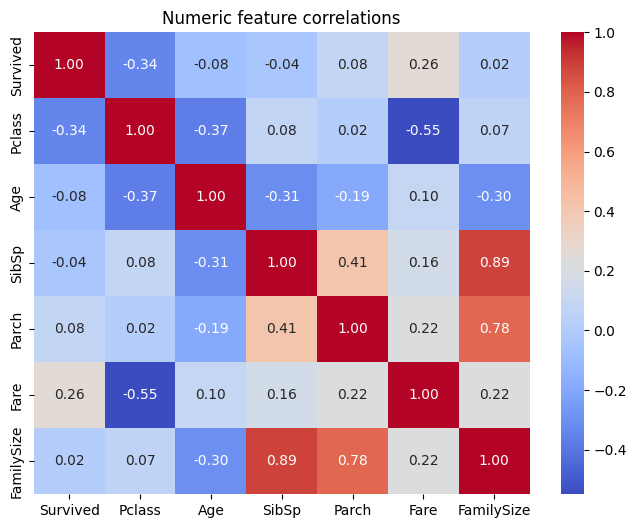

In [14]:
# Correlation heatmap
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Numeric feature correlations")
plt.show()

Handling Missing Values:

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [16]:
df=df.drop(columns=['Cabin']) # Drop 'Cabin' because too many missing (687)

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # Fill missing Age with median

In [18]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Fill missing Embarked with mode, since only 2 values are missing

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

Feature Engineering:

In [20]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket']) # These columns don’t help much

In [21]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])

In [22]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,1,22.0,1,0,7.2500,2,2
1,1,0,38.0,1,0,71.2833,0,2
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,2
4,3,1,35.0,0,0,8.0500,2,1


Encoding Categorical Variables:

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
categorical_cols = ['Sex', 'Embarked', 'Pclass']
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('encoder', OneHotEncoder(drop='first'))])
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [24]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('categorical', categorical_transformer, categorical_cols),('numeric', numeric_transformer, numeric_cols)])

In [25]:
import pandas as pd
X_processed = preprocessor.fit_transform(X)
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
print(X_processed_df.head())

   categorical__Sex_1  categorical__Embarked_1  categorical__Embarked_2  \
0                 1.0                      0.0                      1.0   
1                 0.0                      0.0                      0.0   
2                 0.0                      0.0                      1.0   
3                 0.0                      0.0                      1.0   
4                 1.0                      0.0                      1.0   

   categorical__Pclass_2  categorical__Pclass_3  numeric__Age  numeric__Fare  \
0                    0.0                    1.0          22.0         7.2500   
1                    0.0                    0.0          38.0        71.2833   
2                    0.0                    1.0          26.0         7.9250   
3                    0.0                    0.0          35.0        53.1000   
4                    0.0                    1.0          35.0         8.0500   

   numeric__SibSp  numeric__Parch  
0             1.0             0.

Train/Test Split:

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000))])

In [28]:
logreg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [29]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
y_pred = logreg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



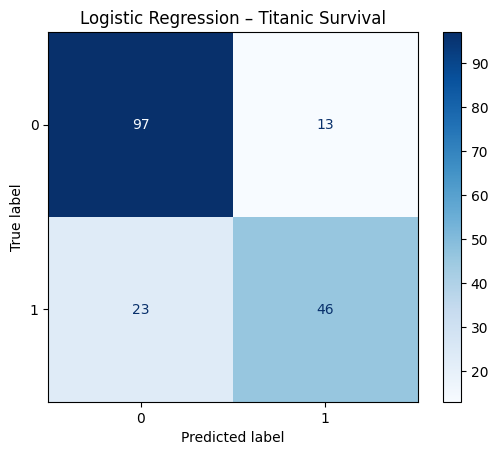

In [30]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, cmap="Blues")
plt.title("Logistic Regression – Titanic Survival")
plt.show()

Other Models:

In [31]:
# KNN
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline([('preprocessor', preprocessor),('knn', KNeighborsClassifier(n_neighbors=5))])
knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print()
print(classification_report(y_test, y_pred_knn, target_names=['Died','Survived']))

KNN Accuracy: 0.664804469273743

              precision    recall  f1-score   support

        Died       0.71      0.77      0.74       110
    Survived       0.58      0.49      0.53        69

    accuracy                           0.66       179
   macro avg       0.64      0.63      0.64       179
weighted avg       0.66      0.66      0.66       179



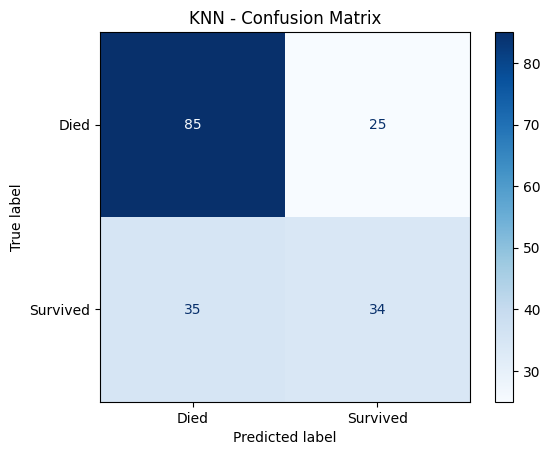

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, display_labels=['Died','Survived'], cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.show()

In [34]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt_pipe = Pipeline([('preprocessor', preprocessor),('dt', DecisionTreeClassifier(random_state=42))])
dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)

In [35]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print()
print(classification_report(y_test, y_pred_dt, target_names=['Died','Survived']))

Decision Tree Accuracy: 0.8156424581005587

              precision    recall  f1-score   support

        Died       0.85      0.85      0.85       110
    Survived       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



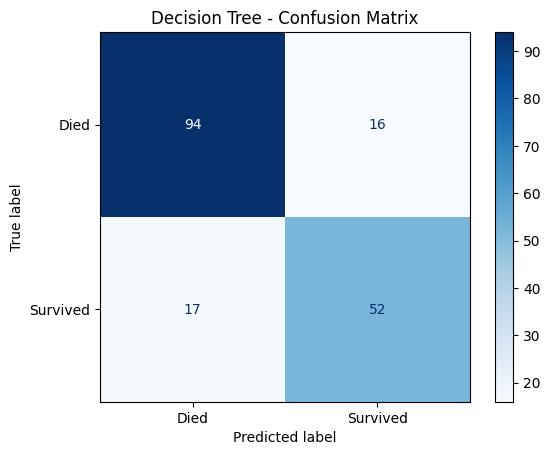

In [36]:
ConfusionMatrixDisplay.from_estimator(dt_pipe, X_test, y_test, display_labels=['Died','Survived'], cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline([('preprocessor', preprocessor),('rf', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

In [38]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print()
print(classification_report(y_test, y_pred_rf, target_names=['Died','Survived']))

Random Forest Accuracy: 0.8156424581005587

              precision    recall  f1-score   support

        Died       0.83      0.88      0.85       110
    Survived       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



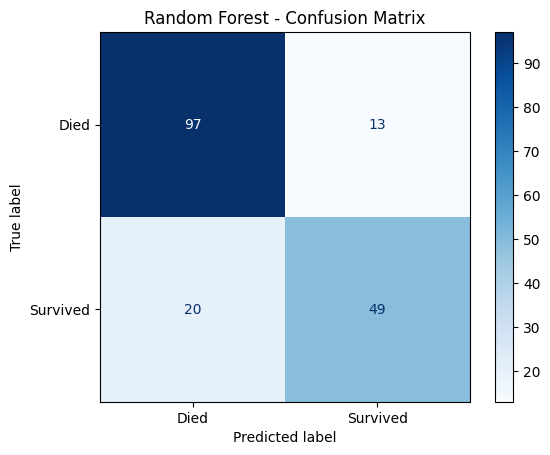

In [39]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_test, y_test, display_labels=['Died','Survived'], cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [40]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svc_pipe = Pipeline([('preprocessor', preprocessor),('svc', SVC(kernel='rbf', probability=True, random_state=42))])
svc_pipe.fit(X_train, y_train)
y_pred_svc = svc_pipe.predict(X_test)

In [41]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print()
print(classification_report(y_test, y_pred_svc, target_names=['Died','Survived']))

SVM Accuracy: 0.6201117318435754

              precision    recall  f1-score   support

        Died       0.64      0.86      0.74       110
    Survived       0.52      0.23      0.32        69

    accuracy                           0.62       179
   macro avg       0.58      0.55      0.53       179
weighted avg       0.59      0.62      0.58       179



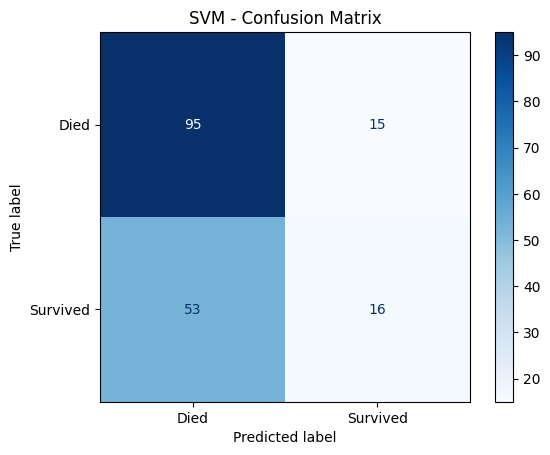

In [42]:
ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test, y_test, display_labels=['Died','Survived'], cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.show()

Final Comparison:

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
models = ['KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svc)
]
results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies}).sort_values('Accuracy', ascending=False)
print(results_df)

           Model  Accuracy
1  Decision Tree  0.815642
2  Random Forest  0.815642
0            KNN  0.664804
3            SVM  0.620112


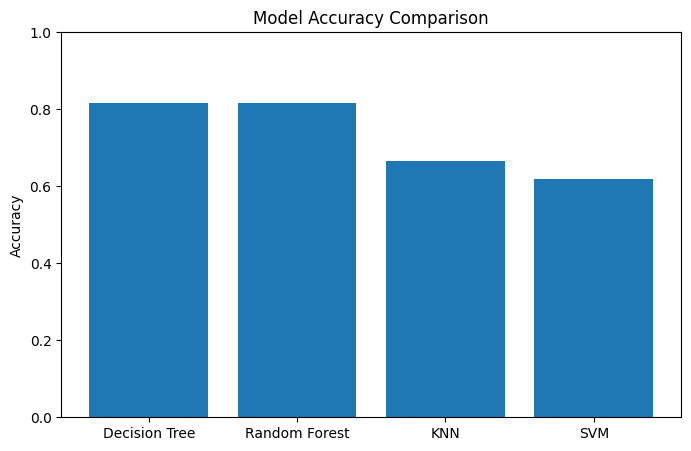

In [44]:
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

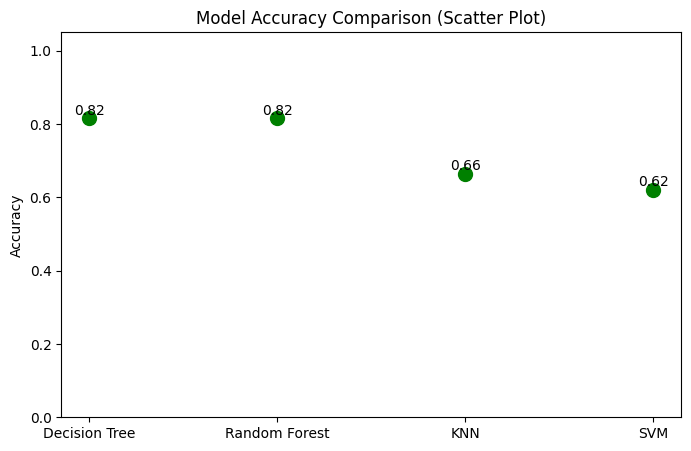

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(results_df['Model'], results_df['Accuracy'], color='green', s=100)
for i, acc in enumerate(results_df['Accuracy']):
    plt.text(i, acc+0.01, f"{acc:.2f}", ha='center', fontsize=10, color='black')
plt.ylim(0,1.05)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Scatter Plot)')
plt.show()